In [ ]:
# -*- coding: utf-8 -*-
# @Author  : Xianmu Wang (Maki)
# @FileName: DataAnalysis_DellInterview
# !/usr/bin/env python3

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Analyze the ranking of 7 different constructs

In [3]:
df = pd.read_csv('constructs_votes_imprtance.csv')
df

,Construct:,Important_1,Important_2,Important_3,Important_4,Important_5,Important_6,Important_7
0,Literacy:,11,4,4,2,1,0,3
1,Skills:,6,6,5,5,2,1,0
2,Confidence:,2,5,6,4,4,2,2
3,Competence:,1,5,7,6,1,5,0
4,Autonomy:,0,0,1,2,5,4,13
5,Accountability:,5,1,0,1,8,4,6
6,Responsibility:,0,4,2,5,4,9,1


Since we're gonna sorting `Constructs` based on `Weighted Importance`, after observation, we need to convert the current variable names `Important_x` into a separate column `Importance` with variable values.

In [4]:
melted = pd.melt(df, id_vars='Construct:', var_name='Importance',value_name='Votes')
melted

,Construct:,Importance,Votes
0,Literacy:,Important_1,11
1,Skills:,Important_1,6
2,Confidence:,Important_1,2
3,Competence:,Important_1,1
4,Autonomy:,Important_1,0
5,Accountability:,Important_1,5
6,Responsibility:,Important_1,0
7,Literacy:,Important_2,4
8,Skills:,Important_2,6
9,Confidence:,Important_2,5


In [5]:
importance_map = {
    'Important_1': 7,
    'Important_2': 6,
    'Important_3': 5,
    'Important_4': 4,
    'Important_5': 3,
    'Important_6': 2,
    'Important_7': 1
}


melted['Importance'] = melted['Importance'].replace(importance_map)
melted

,Construct:,Importance,Votes
0,Literacy:,7,11
1,Skills:,7,6
2,Confidence:,7,2
3,Competence:,7,1
4,Autonomy:,7,0
5,Accountability:,7,5
6,Responsibility:,7,0
7,Literacy:,6,4
8,Skills:,6,6
9,Confidence:,6,5


Assign weights from `7` to `1` to `important_1` through `important_7`, converting qualitative data into quantitative data to facilitate subsequent numerical calculations.

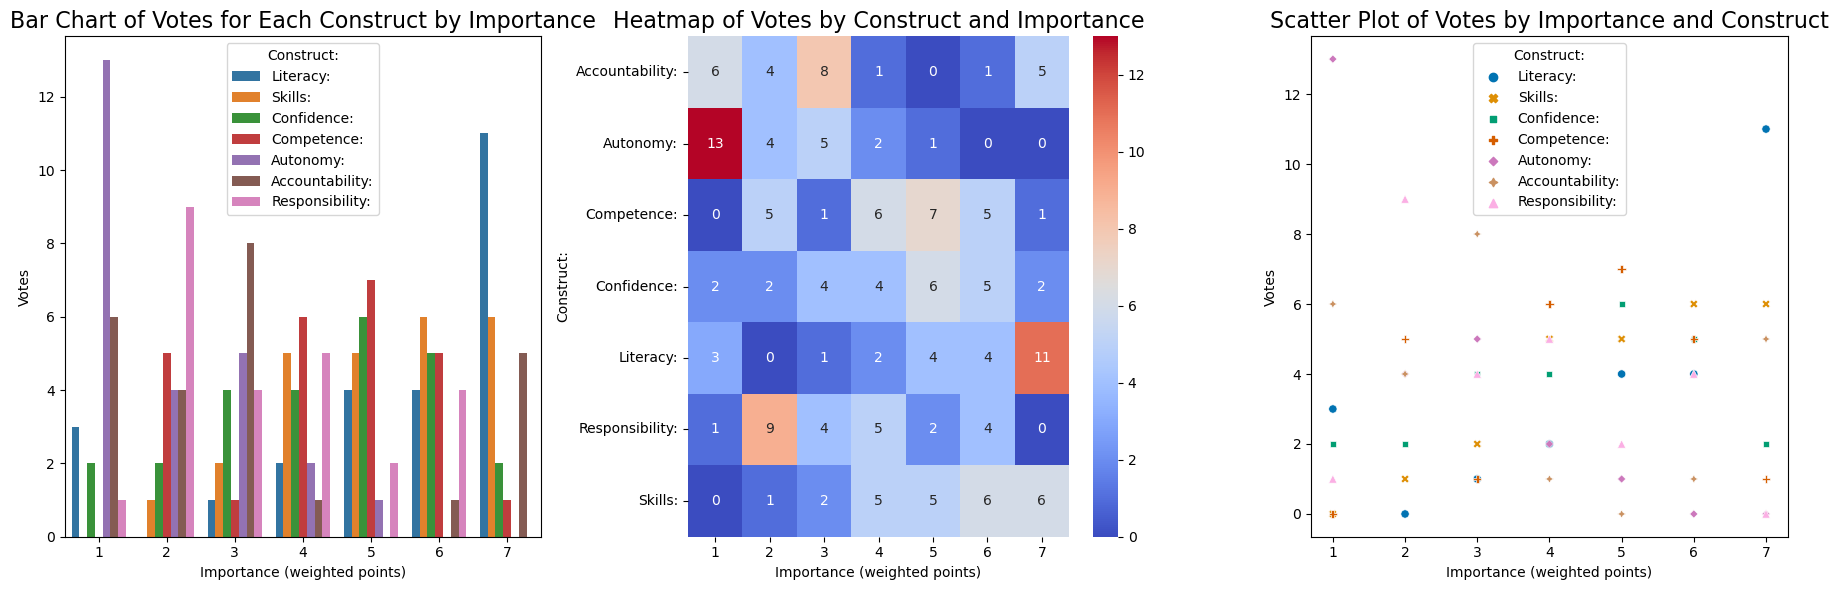

In [6]:
fig, axes = plt.subplots(1,3, figsize=(18,6))
bar_plot = sns.barplot(melted, x='Importance', y='Votes', hue='Construct:', ax=axes[0])
bar_plot.set_title('Bar Chart of Votes for Each Construct by Importance', fontsize=16)
bar_plot.set_xlabel('Importance (weighted points)')

melted_pivot = melted.pivot(index='Construct:', columns='Importance', values='Votes')
heat_map = sns.heatmap(melted_pivot, annot=True, cmap='coolwarm', ax=axes[1])
heat_map.set_title('Heatmap of Votes by Construct and Importance', fontsize=16)
heat_map.set_xlabel('Importance (weighted points)')

scatter_plot = sns.scatterplot(melted, x='Importance', y='Votes', hue='Construct:', style='Construct:', palette='colorblind', ax=axes[2])
scatter_plot.set_title('Scatter Plot of Votes by Importance and Construct', fontsize=16)
scatter_plot.set_xlabel('Importance (weighted points)')

plt.tight_layout()
plt.show()

Before continuing with the analysis, the existing data can be visualized in different ways, to make preliminary observations of the number of votes for different Constructs under various Weighted Importances (with 7 being the most important and 1 being the least important).

In [7]:
melted['Weighted Importance'] = melted['Importance'] * melted['Votes']
melted

,Construct:,Importance,Votes,Weighted Importance
0,Literacy:,7,11,77
1,Skills:,7,6,42
2,Confidence:,7,2,14
3,Competence:,7,1,7
4,Autonomy:,7,0,0
5,Accountability:,7,5,35
6,Responsibility:,7,0,0
7,Literacy:,6,4,24
8,Skills:,6,6,36
9,Confidence:,6,5,30


In [8]:
sum_weighted_importance = melted.groupby('Construct:')['Weighted Importance'].sum().reset_index()
sum_weighted_importance.rename(columns={'Weighted Importance':'Sum Weighted Importance'}, inplace=True)
sum_weighted_importance

,Construct:,Sum Weighted Importance
0,Accountability:,83
1,Autonomy:,49
2,Competence:,109
3,Confidence:,108
4,Literacy:,135
5,Responsibility:,85
6,Skills:,131


In [9]:
sum_weighted_importance_sorted = sum_weighted_importance.sort_values(by='Sum Weighted Importance', ascending=False)
sum_weighted_importance_sorted

,Construct:,Sum Weighted Importance
4,Literacy:,135
6,Skills:,131
2,Competence:,109
3,Confidence:,108
5,Responsibility:,85
0,Accountability:,83
1,Autonomy:,49


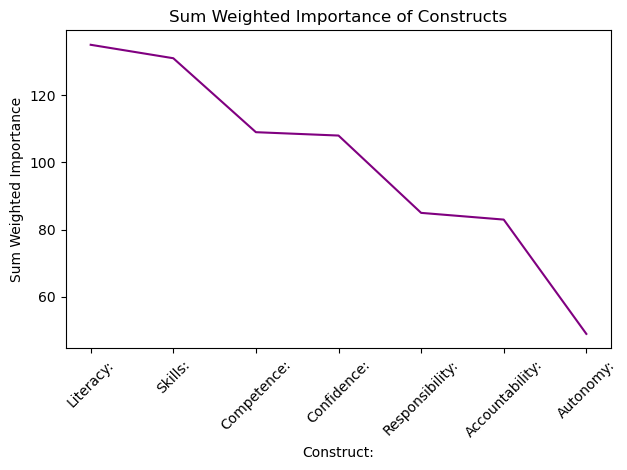

In [10]:
sns.lineplot(sum_weighted_importance_sorted, x='Construct:', y='Sum Weighted Importance', color='purple')
plt.title('Sum Weighted Importance of Constructs')
plt.xticks(rotation=45) 
plt.tight_layout()
plt.show()

## ✅ AnalysisResult:
> Arrange the returned results in descending order based on `Sum Weighted Importance` to obtain the sequence of constructs ranked by weighted importance.：
1. Literacy
2. Skills
3. Competence
4. Confidence
5. Responsibility
6. Accountability
7. Autonomy

# 2. Analyze the ranking of 7 different constructs across different profession categories

*Based on respondents' professions, we categorize occupations into four main categories for ease of subsequent analysis, according to common understanding*:：
1. **Management**：
- Project Manager
- Manager
- Senior Advisor
2. **Engineer**：
- Process Engineer
- Manufacturing Engineer
- Engineer
3. **Frontline**：
- General Operator
- Technician
- Production Associate
- Product Tester
- Senior Operative
- Debug Technician
4. **L&D**：
- Learning & Development 

In [11]:
df2 = pd.read_csv('role_importance_construct.csv')
df2

,Candidate:,Role:,Most Important:,2,3,4,5,6,Least Important:
0,Candidate 1,Process Engineer,Literacy,Confidence,Competence,Skills,Accountability,Responsibility,Autonomy
1,Candidate 2,Process Engineer,Literacy,Confidence,Skills,Competence,Accountability,Responsibility,Autonomy
2,Candidate 3,Project Manager,Literacy,Skills,Competence,Responsibility,Accountability,Confidence,Autonomy
3,Candidate 15,Learning & Development,Literacy,Skills,Confidence,Autonomy,Competence,Responsibility,Accountability
4,Candidate 16,General Operator,Skills,Literacy,Confidence,Responsibility,Accountability,Competence,Autonomy
5,Candidate 6,Technician,Confidence,Competence,Skills,Literacy,Autonomy,Responsibility,Accountability
6,Candidate 17,Manager,Accountability,Responsibility,Competence,Skills,Confidence,Autonomy,Literacy
7,Candidate 7,Production Associate,Literacy,Confidence,Skills,Competence,Autonomy,Accountability,Responsibility
8,Candidate 9,Technician,Accountability,Responsibility,Confidence,Autonomy,Skills,Competence,Literacy
9,Candidate 8,Production Associate,Skills,Literacy,Confidence,Competence,Accountability,Responsibility,Autonomy


In [12]:
job_categories = {
    'Management': ['Project Manager', 'Manager', 'Senior Advisor'],
    'Engineer': ['Process Engineer', 'Manufacturing Engineer', 'Engineer'],
    'Frontline': ['General Operator', 'Technician', 'Production Associate', 'Product Tester', 'Senior Operative', 'Debug Technician'],
    'L&D': ['Learning & Development']
}

In [13]:
classified_data = dict()

In [14]:
for category in job_categories:
    classified_data[category] = {importance: [] for importance in df2.columns if importance != 'Candidate:' and importance != 'Role:'}
classified_data

{'Management': {'Most Important:': [],
  '2': [],
  '3': [],
  '4': [],
  '5': [],
  '6': [],
  'Least Important:': []},
 'Engineer': {'Most Important:': [],
  '2': [],
  '3': [],
  '4': [],
  '5': [],
  '6': [],
  'Least Important:': []},
 'Frontline': {'Most Important:': [],
  '2': [],
  '3': [],
  '4': [],
  '5': [],
  '6': [],
  'Least Important:': []},
 'L&D': {'Most Important:': [],
  '2': [],
  '3': [],
  '4': [],
  '5': [],
  '6': [],
  'Least Important:': []}}

Using the key names from the job category dictionary we have built, initially create a dictionary for DataFrame where the job categories are the column names, importance is the index, and the lists composed of constructs are the values (currently, the lists are still empty)

In [15]:
for _, row in df2.iterrows():
    role = row['Role:']
    for category, roles in job_categories.items():
        if role in roles:
            for importance in df2.columns:
                if importance != 'Candidate:' and importance != 'Role:':
                    classified_data[category][importance].append(row[importance])


In [16]:
classified_data_df = pd.DataFrame(classified_data)
classified_data_df

,Management,Engineer,Frontline,L&D
Most Important:,"[Literacy, Accountability, Skills]","[Literacy, Literacy, Accountability, Literacy]","[Skills, Confidence, Literacy, Accountability,...","[Literacy, Competence]"
2,"[Skills, Responsibility, Literacy]","[Confidence, Confidence, Responsibility, Compe...","[Literacy, Competence, Confidence, Responsibil...","[Skills, Skills]"
3,"[Competence, Competence, Competence]","[Competence, Skills, Literacy, Skills]","[Confidence, Skills, Skills, Confidence, Confi...","[Confidence, Literacy]"
4,"[Responsibility, Skills, Confidence]","[Skills, Competence, Skills, Responsibility]","[Responsibility, Literacy, Competence, Autonom...","[Autonomy, Confidence]"
5,"[Accountability, Confidence, Responsibility]","[Accountability, Accountability, Autonomy, Con...","[Accountability, Autonomy, Autonomy, Skills, A...","[Competence, Accountability]"
6,"[Confidence, Autonomy, Accountability]","[Responsibility, Responsibility, Competence, A...","[Competence, Responsibility, Accountability, C...","[Responsibility, Responsibility]"
Least Important:,"[Autonomy, Literacy, Autonomy]","[Autonomy, Autonomy, Confidence, Autonomy]","[Autonomy, Accountability, Responsibility, Lit...","[Accountability, Autonomy]"


In [17]:
classified_data_df.rename(index={'Most Important:':7,'2':6,'3':5,'4':4,'5':3,'6':2,'Least Important:':1}, inplace=True)
classified_data_df.reset_index(inplace=True)
classified_data_df.rename(columns={'index':'Importance'}, inplace=True)
classified_data_df

,Importance,Management,Engineer,Frontline,L&D
0,7,"[Literacy, Accountability, Skills]","[Literacy, Literacy, Accountability, Literacy]","[Skills, Confidence, Literacy, Accountability,...","[Literacy, Competence]"
1,6,"[Skills, Responsibility, Literacy]","[Confidence, Confidence, Responsibility, Compe...","[Literacy, Competence, Confidence, Responsibil...","[Skills, Skills]"
2,5,"[Competence, Competence, Competence]","[Competence, Skills, Literacy, Skills]","[Confidence, Skills, Skills, Confidence, Confi...","[Confidence, Literacy]"
3,4,"[Responsibility, Skills, Confidence]","[Skills, Competence, Skills, Responsibility]","[Responsibility, Literacy, Competence, Autonom...","[Autonomy, Confidence]"
4,3,"[Accountability, Confidence, Responsibility]","[Accountability, Accountability, Autonomy, Con...","[Accountability, Autonomy, Autonomy, Skills, A...","[Competence, Accountability]"
5,2,"[Confidence, Autonomy, Accountability]","[Responsibility, Responsibility, Competence, A...","[Competence, Responsibility, Accountability, C...","[Responsibility, Responsibility]"
6,1,"[Autonomy, Literacy, Autonomy]","[Autonomy, Autonomy, Confidence, Autonomy]","[Autonomy, Accountability, Responsibility, Lit...","[Accountability, Autonomy]"


Assign weights to importance, with the most important being 7 and the least important being 1.

In [18]:
def calculate_total_sum(data_df, category, keyword):
    total_sum = 0
    for i in range(len(data_df[category])):
        count = data_df[category][i].count(keyword)
        importance_value = data_df['Importance'][i]
        contribution = count * importance_value
        total_sum += contribution
    return total_sum

categories = ['Management', 'Engineer', 'Frontline', 'L&D']  
keywords = ['Literacy', 'Confidence', 'Competence', 'Skills', 'Accountability', 'Responsibility', 'Autonomy']

results = []

for category in categories:
    for keyword in keywords:
        total_sum = calculate_total_sum(classified_data_df, category, keyword)
        results.append({'Category': category, 'Construct': keyword, 'Sum_Weighted_Importance': total_sum})
        print(f'{category} {keyword} Sum_Weighted_Importance: {total_sum}')

category_sum_weighted_importance = pd.DataFrame(results)

category_sum_weighted_importance

Management Literacy Sum_Weighted_Importance: 14
Management Confidence Sum_Weighted_Importance: 9
Management Competence Sum_Weighted_Importance: 15
Management Skills Sum_Weighted_Importance: 17
Management Accountability Sum_Weighted_Importance: 12
Management Responsibility Sum_Weighted_Importance: 13
Management Autonomy Sum_Weighted_Importance: 4
Engineer Literacy Sum_Weighted_Importance: 26
Engineer Confidence Sum_Weighted_Importance: 16
Engineer Competence Sum_Weighted_Importance: 17
Engineer Skills Sum_Weighted_Importance: 18
Engineer Accountability Sum_Weighted_Importance: 15
Engineer Responsibility Sum_Weighted_Importance: 14
Engineer Autonomy Sum_Weighted_Importance: 6
Frontline Literacy Sum_Weighted_Importance: 70
Frontline Confidence Sum_Weighted_Importance: 67
Frontline Competence Sum_Weighted_Importance: 58
Frontline Skills Sum_Weighted_Importance: 72
Frontline Accountability Sum_Weighted_Importance: 46
Frontline Responsibility Sum_Weighted_Importance: 48
Frontline Autonomy Su

,Category,Construct,Sum_Weighted_Importance
0,Management,Literacy,14
1,Management,Confidence,9
2,Management,Competence,15
3,Management,Skills,17
4,Management,Accountability,12
5,Management,Responsibility,13
6,Management,Autonomy,4
7,Engineer,Literacy,26
8,Engineer,Confidence,16
9,Engineer,Competence,17


Define a function `calculate_total_sum` that calculates the total weighted importance for each job category corresponding to each construct (weighted importance multiplied by the number of occurrences of each construct under each importance), and reconstructs a new DataFrame that meets the analysis requirements.

In [26]:
category_sum_weighted_importance_sorted = category_sum_weighted_importance.sort_values(by=['Category', 'Sum_Weighted_Importance'], ascending=[True, False])
category_sum_weighted_importance_sorted

,Category,Construct,Sum_Weighted_Importance
7,Engineer,Literacy,26
10,Engineer,Skills,18
9,Engineer,Competence,17
8,Engineer,Confidence,16
11,Engineer,Accountability,15
12,Engineer,Responsibility,14
13,Engineer,Autonomy,6
17,Frontline,Skills,72
14,Frontline,Literacy,70
15,Frontline,Confidence,67


## ✅ AnalysisResult:
> Arrange the returned results in descending order based on `Sum Weighted Importance` to obtain the sequence of constructs ranked by weighted importance：

**Engineer**:  
1. Literacy
2. Skills
3. Competence
4. Confidence		
5. Accountability
6. Responsibility
7. Autonomy	

**Frontline**:  
1. Skills
2. Literacy
3. Confidence
4. Competence	
5. Responsibility
6. Accountability
7. Autonomy

**L&D**:  
1. Literacy
2. Skills	
3. Competence
4. Confidence
5. Autonomy
6. Accountability
7. Responsibility

**Management**:  
1. Skills
2. Competence	
3. Literacy
4. Responsibility
5. Accountability
6. Confidence
7. Autonomy

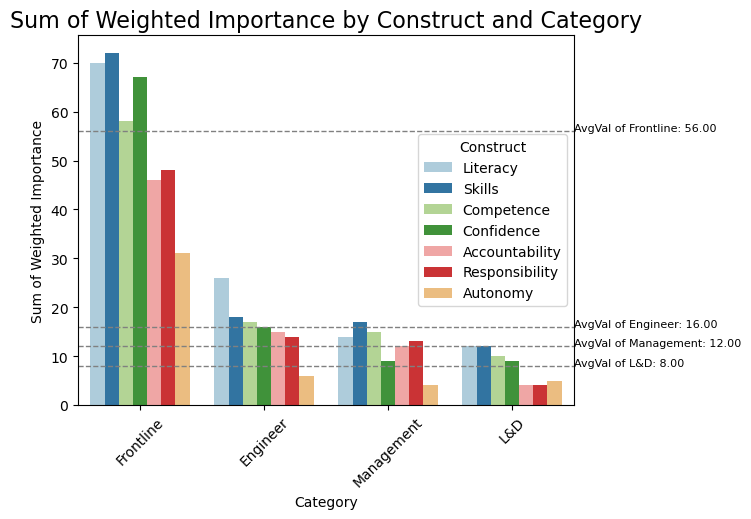

In [34]:
sns.barplot(category_sum_weighted_importance_sorted, x='Category', y='Sum_Weighted_Importance', hue='Construct', palette='Paired', 
            order=category_sum_weighted_importance_sorted
            .groupby('Category')['Sum_Weighted_Importance']
            .sum()
            .reset_index()
            .sort_values(by='Sum_Weighted_Importance', ascending=False)['Category'])
for category in categories:
    avg_value = category_sum_weighted_importance_sorted[category_sum_weighted_importance_sorted['Category'] == category]['Sum_Weighted_Importance'].mean()
    line = plt.axhline(y=avg_value, color='gray', linestyle='--', linewidth=1)
    plt.text(
        x=3.5, 
        y=avg_value, 
        s=f'AvgVal of {category}: {avg_value:.2f}', 
        fontsize=8, 
    )

plt.title('Sum of Weighted Importance by Construct and Category', fontsize=16)
plt.xticks(rotation=45)
plt.ylabel('Sum of Weighted Importance')
plt.show()